### Problem 2.7

In [45]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

df1 = pd.read_csv('obesity_election_2004.csv')
df1.columns = ['State', 'index', 'vote', 'abbv']

## Use 2004 as train
# Convert the index str to float and save it as feature
df1['index'] = df1['index'].str.replace('%', '').astype(float) 
X = df1['index'].values.reshape(-1,1) 

# Convert Democrats to 0 and Repulicans to 1 
df1['vote'] = df1['vote'].map({'D': 0, 'R': 1}).values
y = df1['vote']

# Uses Leave one out cross validation to find the optimal k value
loo = LeaveOneOut()
k_vals = range(1,21)
acc_scores = []

for k in k_vals:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)  
    preds = []
        
    for i ,(train_index, test_index) in enumerate(loo.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # print(f"fold {i}")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")

        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        # print(f"k = {k} i = {i} pred = {pred}")
        preds.append(pred)
        
    acc = accuracy_score(y, preds)
    acc_scores.append(acc)
    
opt_k = k_vals[acc_scores.index(max(acc_scores))]
opt_acc = max(acc_scores)
res_err = 1 - opt_acc

opt_k, res_err


(9, 0.28)

- When k = 9, the model has lowest resampling error with 28%
- Use this model to predict the 2000's data

In [35]:
df2 = pd.read_csv('obesity_election_2000.csv')
df2.columns = ['State', 'index', 'vote', 'abbv']

df2['index'] = df2['index'].str.replace('%', '').astype(float) 
X_test = df2['index'].values.reshape(-1,1) 

df2['vote'] = df2['vote'].map({'D': 0, 'R': 1}).values
y_test = df2['vote']


knn = neighbors.KNeighborsClassifier(n_neighbors= opt_k)
knn.fit(X, y) # take 2004 as training data
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
test_err = 1 - acc

test_err


0.5

- The test error rate is 50% 

### Problem 2.8


In [42]:
## Uses 2000 as train
df1 = pd.read_csv('obesity_election_2000.csv') 
df1.columns = ['State', 'index', 'vote', 'abbv']

# Convert the index str to float and save it as feature
df1['index'] = df1['index'].str.replace('%', '').astype(float) 
X = df1['index'].values.reshape(-1,1) 

# Convert Democrats to 0 and Repulicans to 1 
df1['vote'] = df1['vote'].map({'D': 0, 'R': 1}).values
y = df1['vote']

# Uses Leave one out cross validation to find the optimal k value
loo = LeaveOneOut()
k_vals = range(1,21)
acc_scores = []

for k in k_vals:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)  
    preds = []
        
    for i ,(train_index, test_index) in enumerate(loo.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # print(f"fold {i}")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")

        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        # print(f"k = {k} i = {i} pred = {pred}")
        preds.append(pred)
        
    acc = accuracy_score(y, preds)
    acc_scores.append(acc)
    
opt_k = k_vals[acc_scores.index(max(acc_scores))]
opt_acc = max(acc_scores)
res_err = 1 - opt_acc

opt_k, res_err


(12, 0.38)

- This time the resampling error rate is 38%, with optimal k = 12

In [43]:
df2 = pd.read_csv('obesity_election_2004.csv')
df2.columns = ['State', 'index', 'vote', 'abbv']

df2['index'] = df2['index'].str.replace('%', '').astype(float) 
X_test = df2['index'].values.reshape(-1,1) 

df2['vote'] = df2['vote'].map({'D': 0, 'R': 1}).values
y_test = df2['vote']


knn = neighbors.KNeighborsClassifier(n_neighbors= opt_k)
knn.fit(X, y) # take 2004 as training data
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
test_err = 1 - acc

test_err

0.38

- We got a same test error rate as the resamplng one

### Problem 2.11
The data consists of n = 10 samples, (x, y), where x is uniformly distributed in [0,1] 
y = x^2 + 0.1x + noise and the noise has Gaussian distributionN(0, 0.25).
The noise has variance 0.25 or standard deviation 0.5.

Matplotlib is building the font cache; this may take a moment.


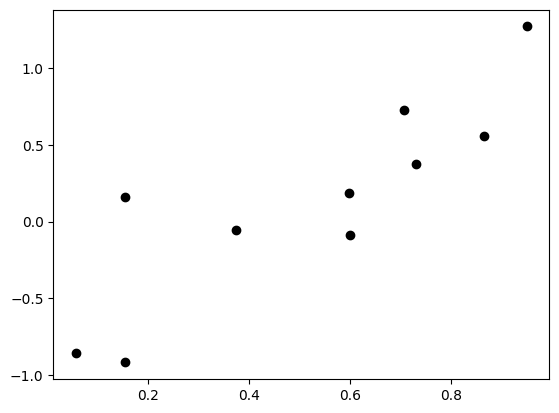

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
x = np.random.uniform(0, 1, 10)
noise = np.random.normal(0, np.sqrt(0.25), 10)
y = x**2 + 0.1 * x + noise
plt.scatter(x, y, color='black', label='Data Points' )


errors = []
complexities = range(1, 6)  # Choose a range for m+1 (e.g., 1 to 5)
for m in complexities:
    # Create feature matrix for trigonometric terms
    X = np.column_stack([np.cos(2 * np.pi * i * x) for i in range(1, m + 1)])
    
    # Add bias term (w_0)
    X = np.column_stack([np.ones(x.shape), X])
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate empirical risk (MSE)
    mse = np.mean((y - y_pred) ** 2)
    errors.append(mse)


